### Notebook setup

#### Import shunpiker pre-set packages and modules
 
For an introduction to python packages and modules, see https://realpython.com/python-modules-packages/#python-packages.    

In [1]:
# import shunpiker pre-set packages and modules
%run shunpiker_modules.py

scanpy==1.8.2 anndata==0.7.6 umap==0.5.2 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.0 python-igraph==0.9.8 pynndescent==0.5.5
phenograph== 1.5.7


💡 **Hint:** Use the code below ONLY if you need to install extra packages

In [2]:
#import sys
#!{sys.executable} -m pip install watermark

#### Set notebook parameters

[`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) sets output of plotting commands to be displayed directly below the code cell that produced it.


<a id='part_1'></a>

In [2]:
# display plot directly below code cell
%matplotlib inline

In [3]:
path_to_h5ad = '/home/kousaa/scRNAseq-analysis/[AK011] Hana_unconvencional-Tcells/notebooks/files/MAIT.h5ad'

In [4]:
adata = sc.read_h5ad(path_to_h5ad)

In [5]:
adata.shape

(25442, 19094)

In [6]:
adata.obs['status'] = ['healthy' if 'healthy' in x else 'patient' if 'patient' in x else 'ERROR' for x in adata.obs['sample']]

In [7]:
adata.uns['status_colors'] = ['#B4C540', '#842D73']

/home/kousaa/miniconda3/envs/AK011_py38/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'status' as categorical


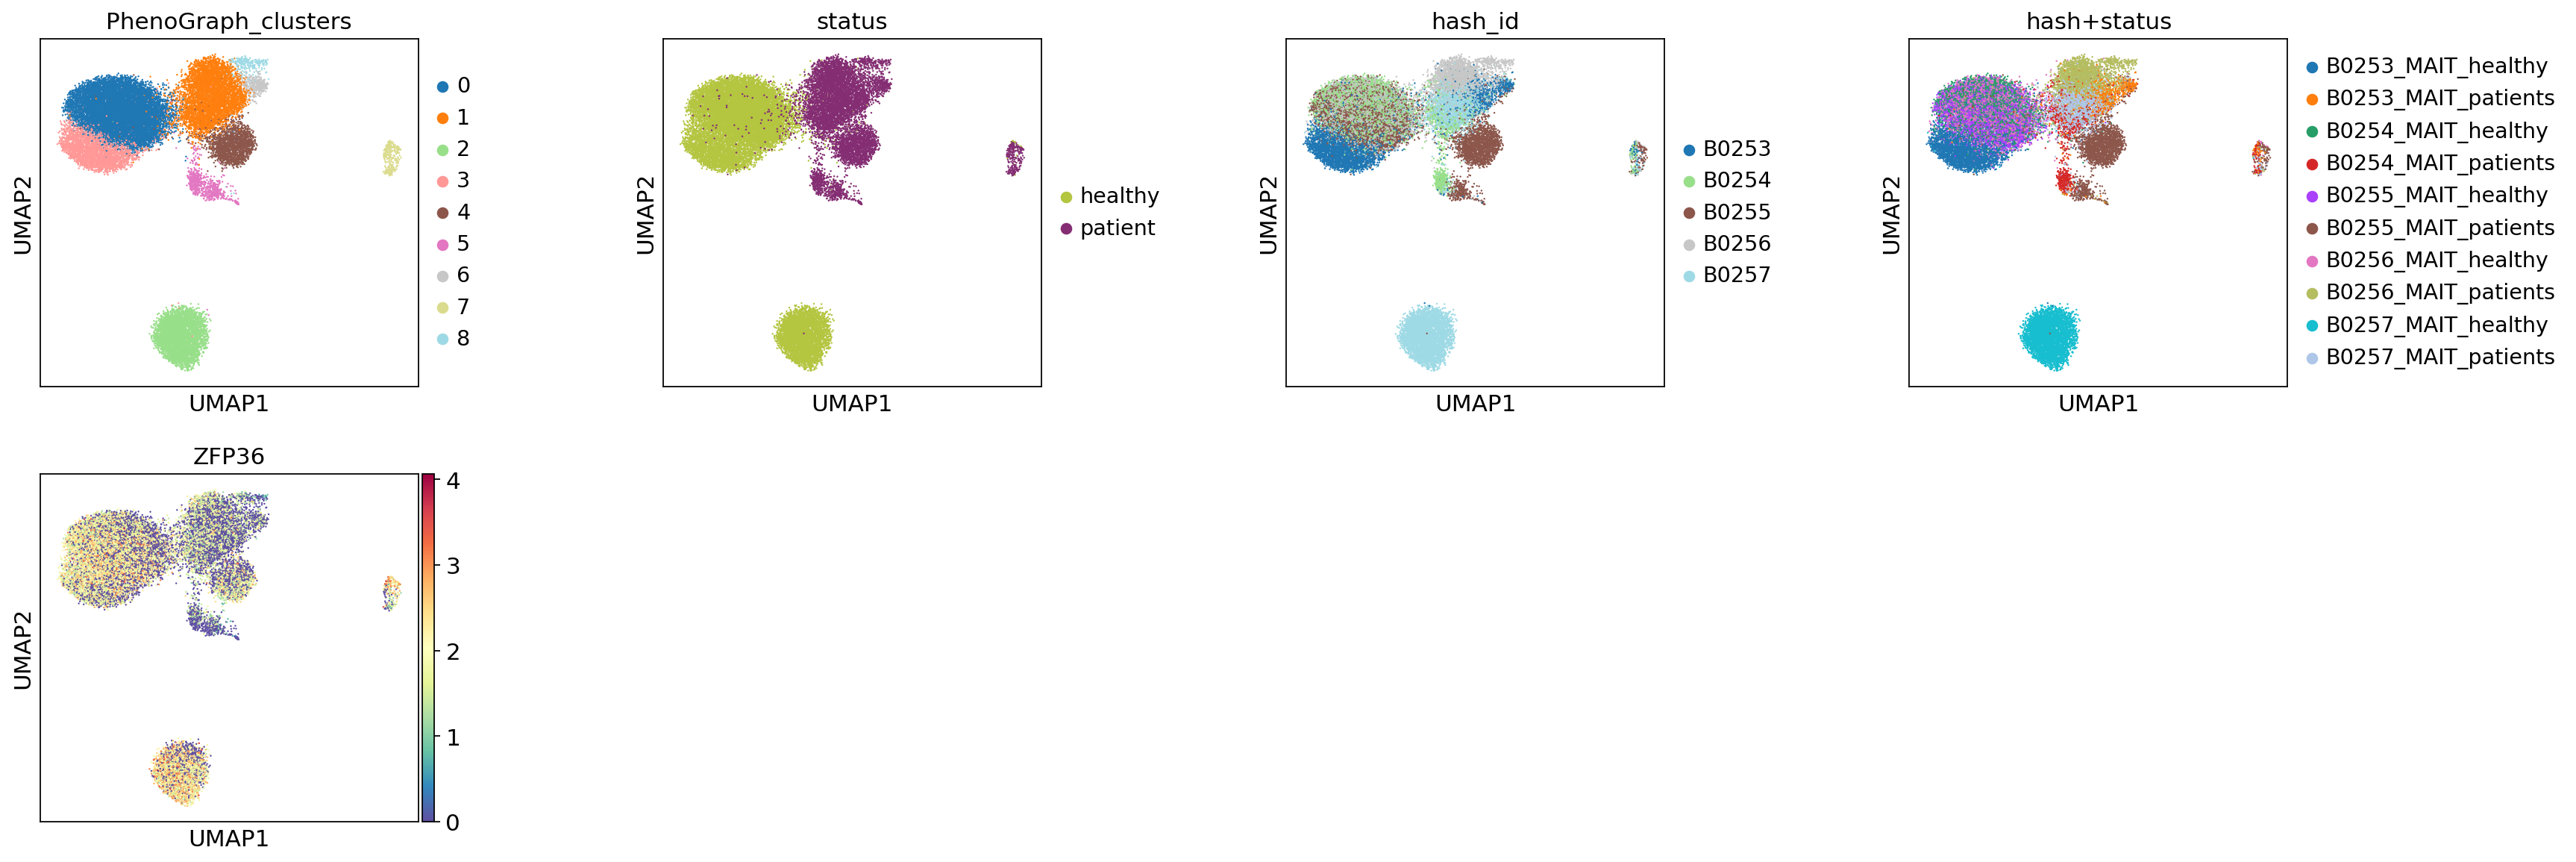

In [8]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata, 
    color=['PhenoGraph_clusters', 'status', 'hash_id', 'hash+status', 'ZFP36'], 
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.5,
    sort_order = False
)

In [9]:
adata_clean = adata[(adata.obs['PhenoGraph_clusters']!=5) & (adata.obs['PhenoGraph_clusters']!=7)]

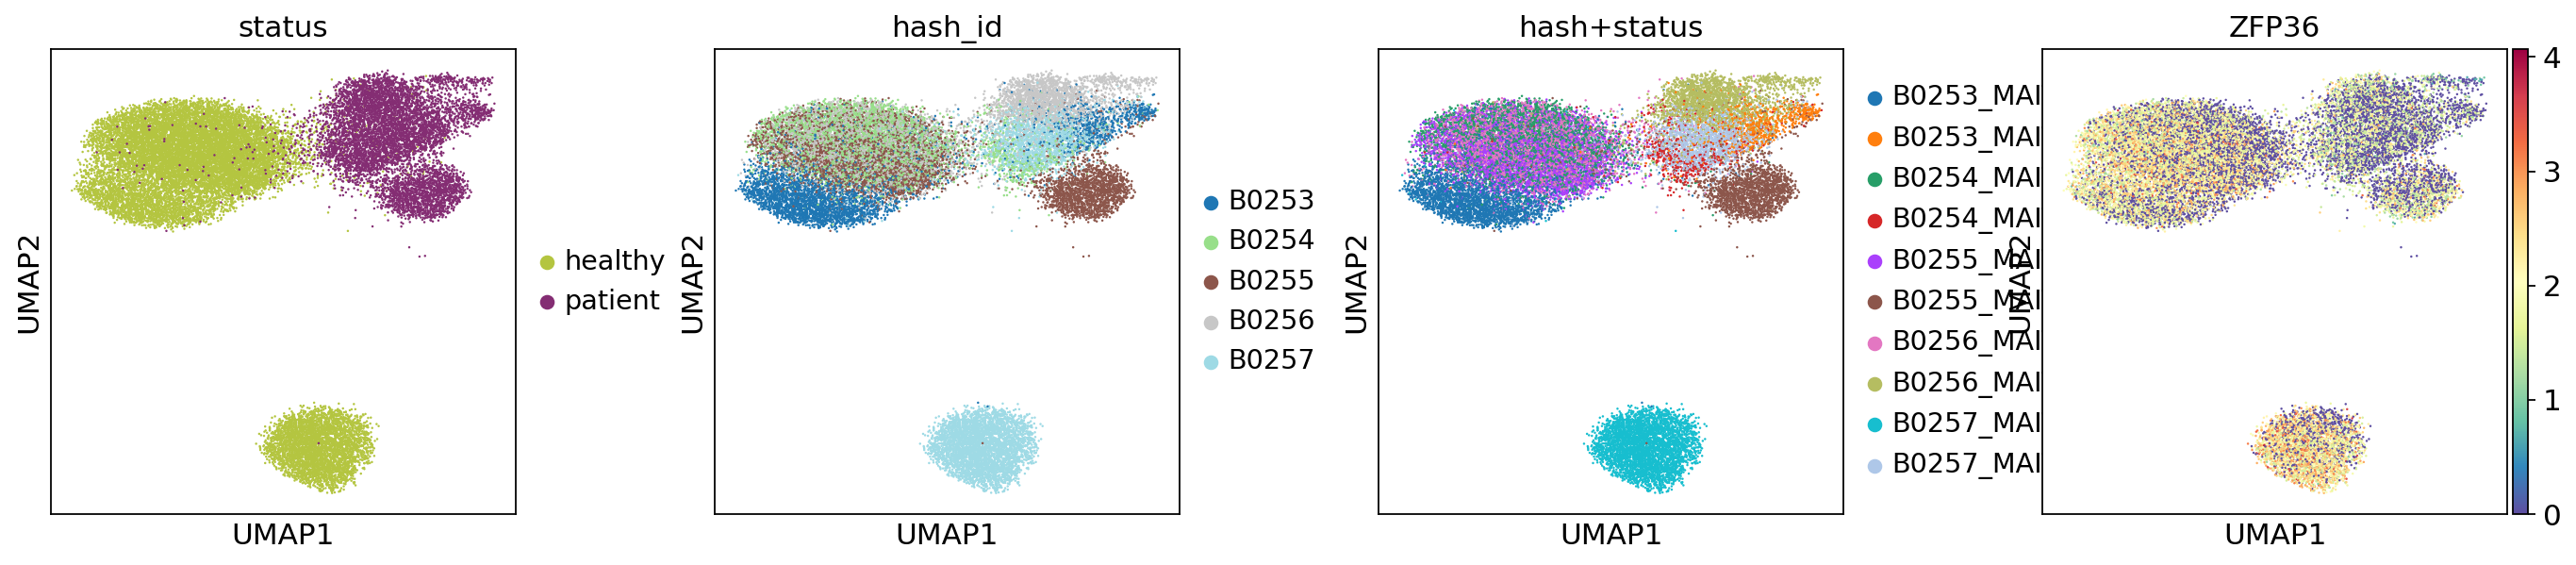

In [10]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata_clean, 
    color=['status', 'hash_id', 'hash+status', 'ZFP36'], 
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.3,
    sort_order = False
)

In [12]:
sc.pp.highly_variable_genes(adata_clean, flavor='seurat')

Trying to set attribute `.uns` of view, copying.


In [13]:
rng = np.random.RandomState(42)
adata_clean = sc.tl.pca(adata_clean, n_comps=200, copy = True, svd_solver='arpack', random_state=rng)

We can visualize the percentage of variance explained by each PC. Based on this figure, we will select a number of principal components to use in the rest of our analysis. 

<function matplotlib.pyplot.show(close=None, block=None)>

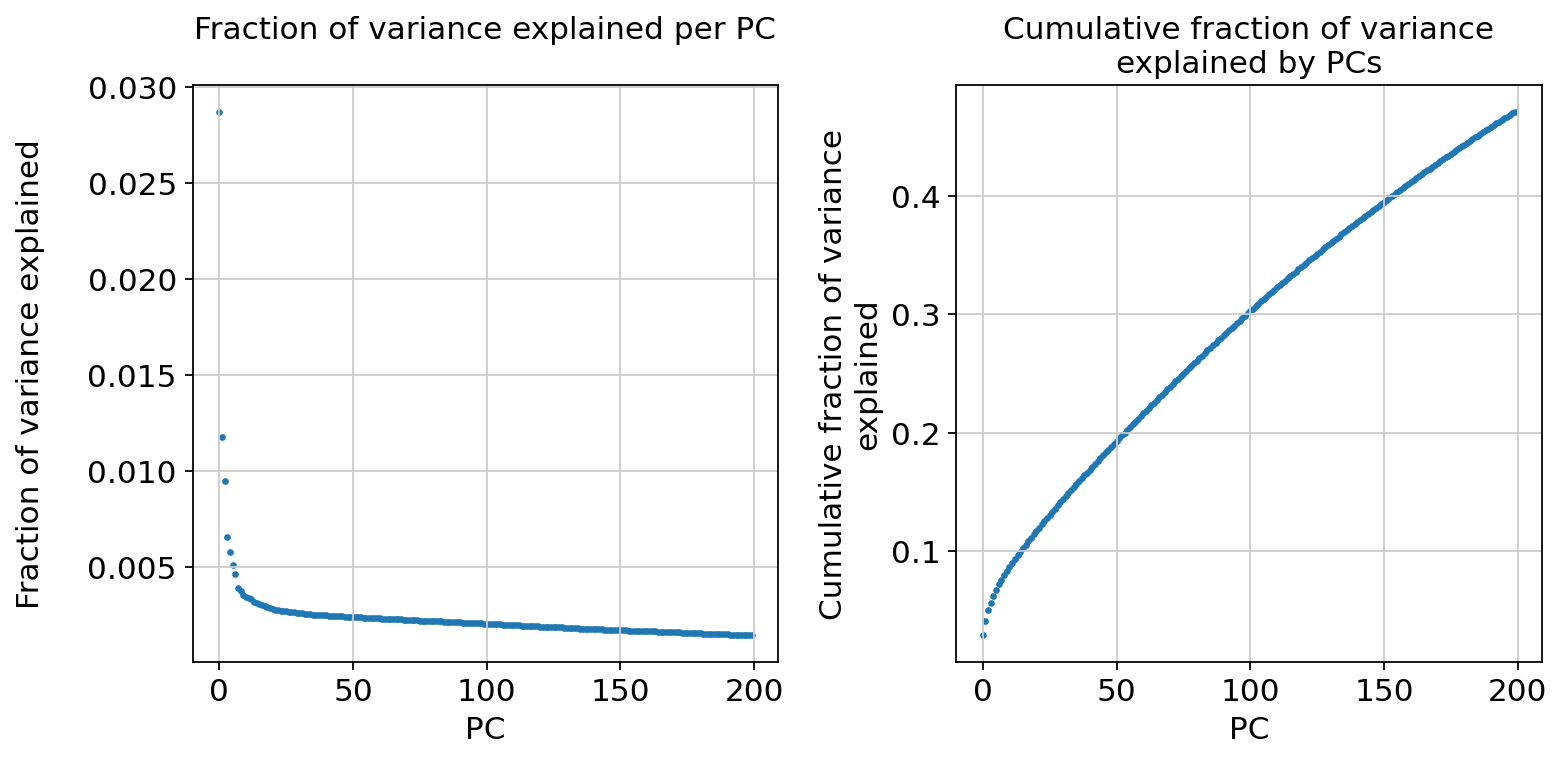

In [14]:
observe_variance(adata_clean)

❗ We want to include all the principal components before the 'knee point' (the point where the fitted curve would change slope the most), because these likely represent important sources of variance in our data. To try to avoid eliminating any relevant but small sources of variance, we will choose a number of PCs slightly to the right of the knee point. 

Replace the number below with your selection and run PCA again.

In [15]:
rng = np.random.RandomState(42)
sc.tl.pca(adata_clean, n_comps=30, svd_solver='arpack', random_state=rng)
sc.pp.neighbors(adata_clean, n_neighbors=15)
sc.tl.umap(adata_clean)

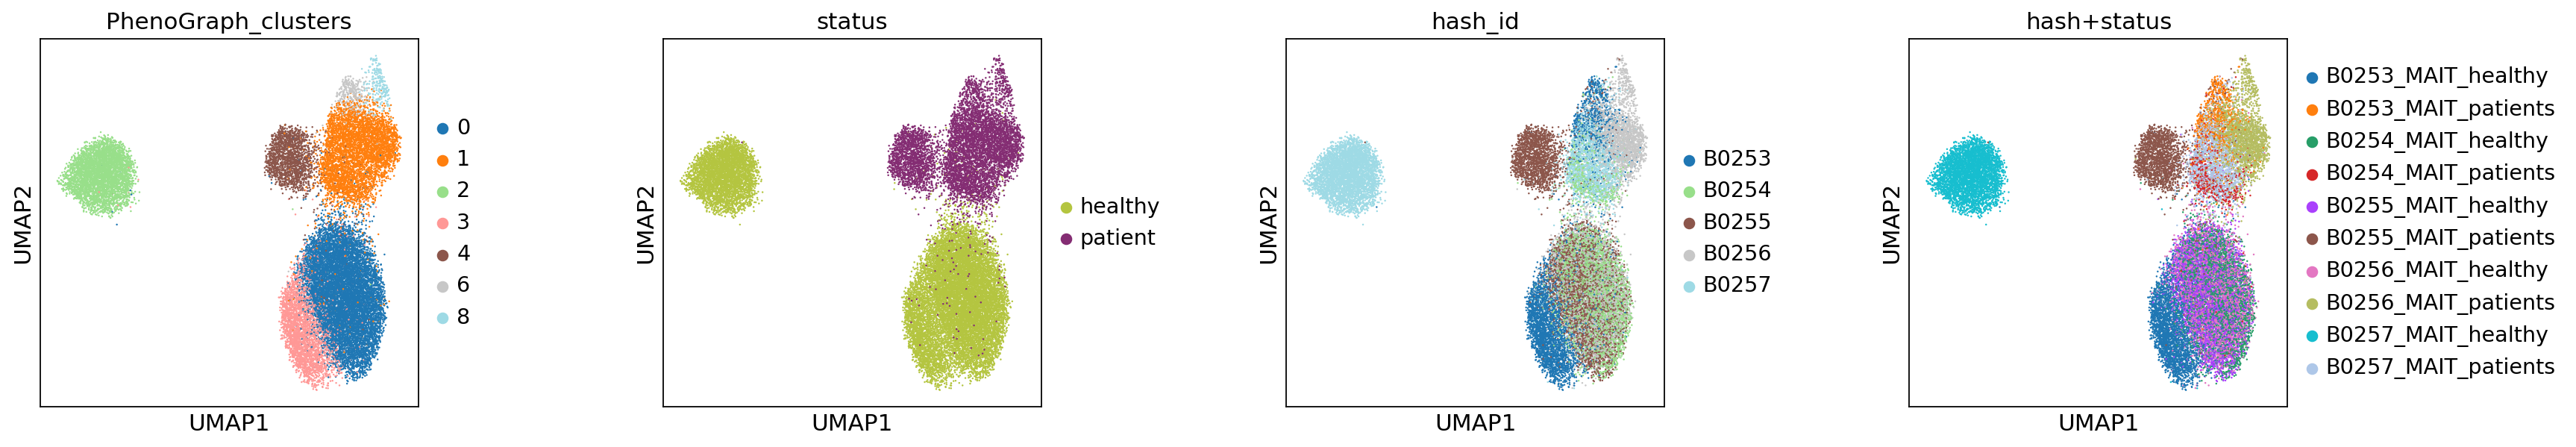

In [16]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata_clean, 
    color=['PhenoGraph_clusters', 'status', 'hash_id', 'hash+status'], 
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.5,
    sort_order = False
)

### Unsupervised clustering analysis using PhenoGraph

In [17]:
# calculate clustering characteristics for a range of ks (5 to 155), by a step of 5.
ks = np.arange(5,155,5)
cluster_chars = [calc_clustering_characteristics(k, adata_clean.obsm['X_pca']) for k in ks];

Finding 5 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 38.58273935317993 seconds
Jaccard graph constructed in 10.703954458236694 seconds
Wrote graph to binary file in 0.09200143814086914 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.942298
Louvain completed 21 runs in 19.865719318389893 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 75.56324219703674 seconds
Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 39.18374013900757 seconds
Jaccard graph constructed in 13.612472772598267 seconds
Wrote graph to binary file in 0.34183454513549805 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.765942
After 13 runs, maximum modularity is Q = 0.767289
Louvain completed 33 runs in 30.447054147720337 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 90.05341458320618 seconds
F

Louvain completed 21 runs in 33.40290904045105 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 156.24734950065613 seconds
Finding 85 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 18.19570517539978 seconds
Jaccard graph constructed in 109.27992653846741 seconds
Wrote graph to binary file in 2.2007298469543457 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.69426
After 15 runs, maximum modularity is Q = 0.695301
Louvain completed 35 runs in 56.03585243225098 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 190.80220127105713 seconds
Finding 90 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 19.333486318588257 seconds
Jaccard graph constructed in 119.3711051940918 seconds
Wrote graph to binary file in 2.5568089485168457 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.693355
Lou

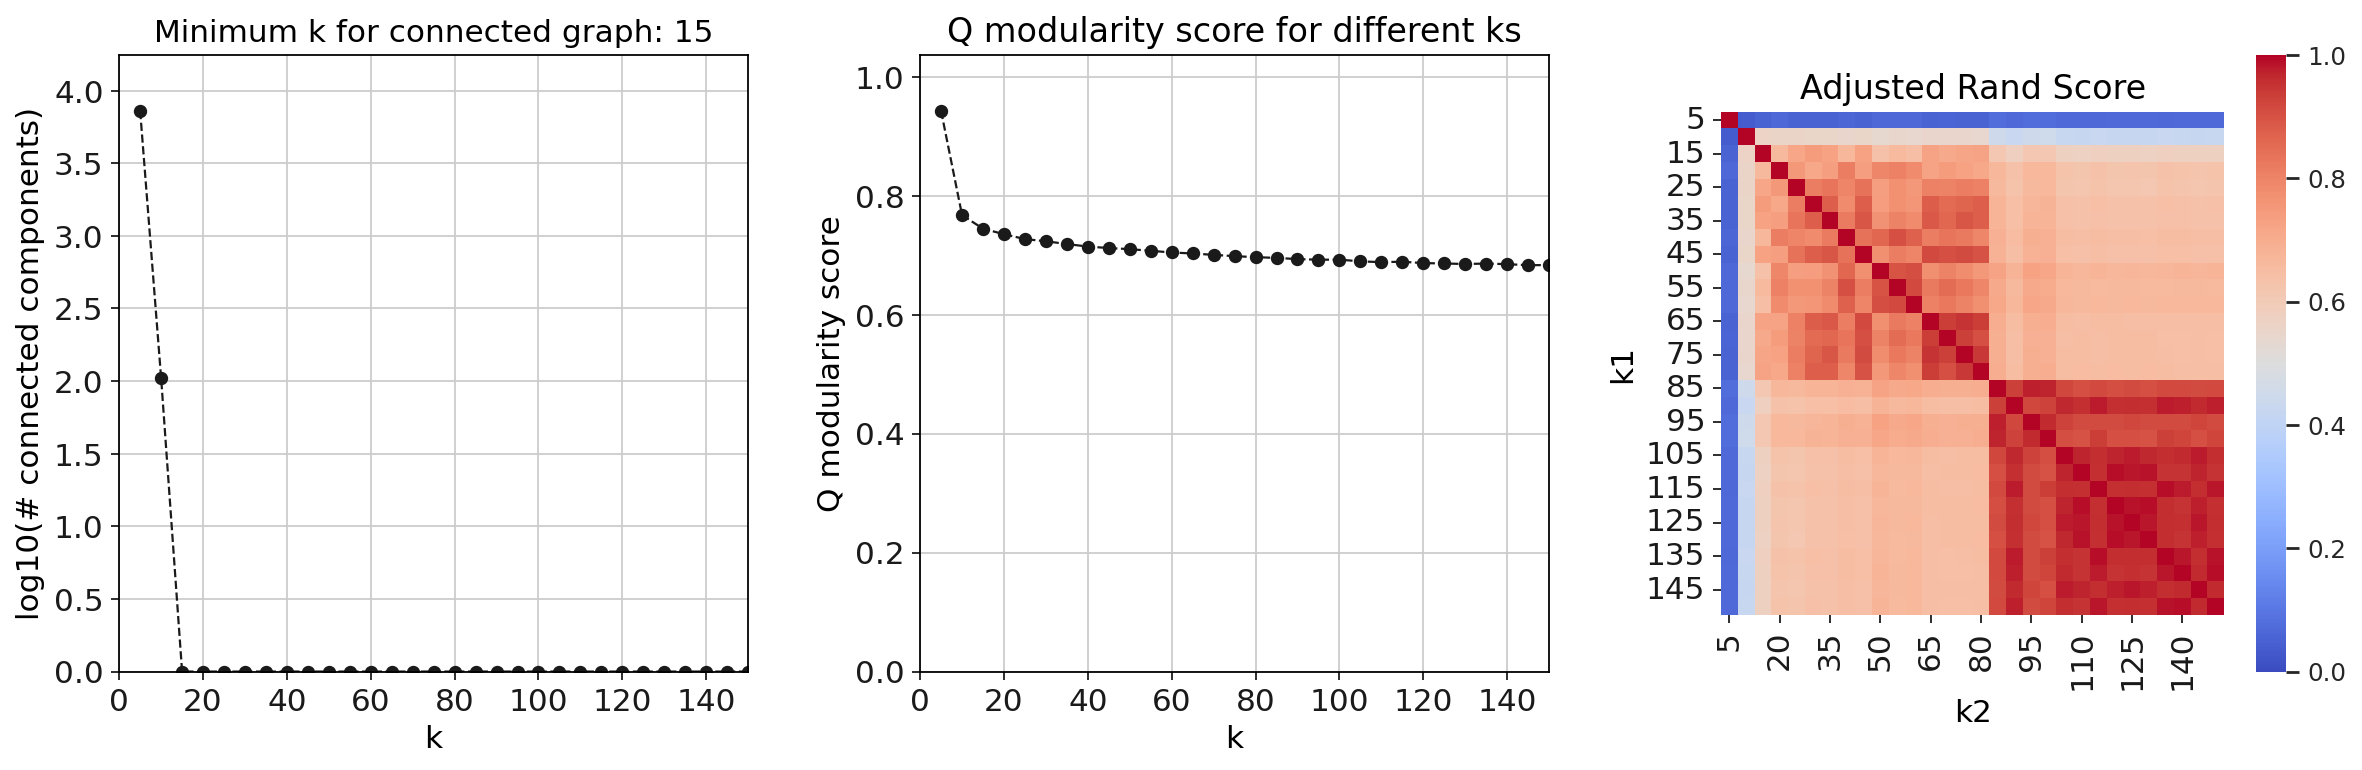

In [18]:
Rand_index_df = inspect_clustering_chars(ks, cluster_chars)

In [19]:
Rand_index_df.iloc[1:13,1:15]

k2,10,15,20,25,30,35,40,45,50,55,60,65,70,75
k1,,,,,,,,,,,,,,
10,1.000000,0.564676,0.555680,0.558094,0.550894,0.553223,0.549233,0.553097,0.536817,0.544533,0.541251,0.549006,0.548823,0.549013
15,0.564676,1.000000,0.662917,0.717362,0.743895,0.729391,0.669054,0.730068,0.634841,0.657239,0.647856,0.725522,0.709604,0.721862
20,0.555680,0.662917,1.000000,0.751891,0.712832,0.737123,0.815223,0.737075,0.796362,0.807689,0.784106,0.725945,0.744717,0.729655
25,0.558094,0.717362,0.751891,1.000000,0.814904,0.835646,0.800018,0.837619,0.738270,0.773311,0.753365,0.808330,0.803825,0.813306
30,0.550894,0.743895,0.712832,0.814904,1.000000,0.877640,0.784408,0.877836,0.739232,0.771462,0.759964,0.880188,0.855067,0.866138
35,0.553223,0.729391,0.737123,0.835646,0.877640,1.000000,0.819250,0.891285,0.768795,0.801316,0.783816,0.887945,0.862923,0.892106
40,0.549233,0.669054,0.815223,0.800018,0.784408,0.819250,1.000000,0.836143,0.860082,0.904934,0.874322,0.815222,0.833029,0.823269
45,0.553097,0.730068,0.737075,0.837619,0.877836,0.891285,0.836143,1.000000,0.774328,0.814116,0.796900,0.916095,0.903972,0.913973
50,0.536817,0.634841,0.796362,0.738270,0.739232,0.768795,0.860082,0.774328,1.000000,0.895708,0.906860,0.776350,0.800995,0.779552


In [24]:
# add your selected k value here to proceed
k=40
communities, graph, Q = sc.external.tl.phenograph(pd.DataFrame(adata_clean.obsm['X_pca']),k=k)
adata_clean.obs['PhenoGraph_clusters'] = pd.Categorical(communities)
adata_clean.uns['PhenoGraph_Q'] = Q
adata_clean.uns['PhenoGraph_k'] = k

Finding 40 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 19.168594121932983 seconds
Jaccard graph constructed in 33.61832237243652 seconds
Wrote graph to binary file in 1.1511635780334473 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.714821
Louvain completed 21 runs in 24.29139494895935 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 82.78790998458862 seconds


We can visualize the clustering to see which clusters match with the cells that we would like to filter out. Inspect the list of QC metrics and canonical markers to make your choice.

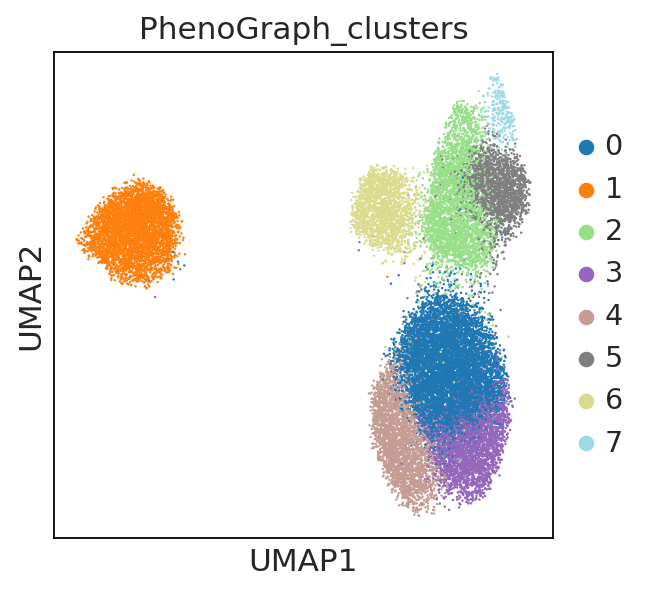

In [25]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata_clean, 
    color=['PhenoGraph_clusters'], 
    palette='tab20',  
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.5,
    sort_order = False
)

In [11]:
path_to_h5ad = '/home/kousaa/scRNAseq-analysis/[AK011] Hana_unconvencional-Tcells/notebooks/files/MAIT_clean.h5ad'

In [27]:
adata_clean.write(path_to_h5ad)

In [12]:
adata = sc.read_h5ad(path_to_h5ad)

In [10]:
canonical_markers = ['PTPRC', 'CD3D', 'KLRB1', 'SLC4A10', 'TRAV1-2', 'IL7R', 'NKG7', 'RORC', 'CD8A', 'CD4', 'DPP4', 'IFNG', 'GZMB', 'TNF', 'TBX21',
           'NR4A1', 'FOS', 'JUN', 'CD69', 'CCR7',  'SELL', 'CD4', 'LEF1', 'RUNX3', 'IFIT3', 'ISG15', 'METRNL',  'TNFRSF4', 'FOXP3',  'CD68', 'ANPEP', 'SIRPA', 'CLEC10A']

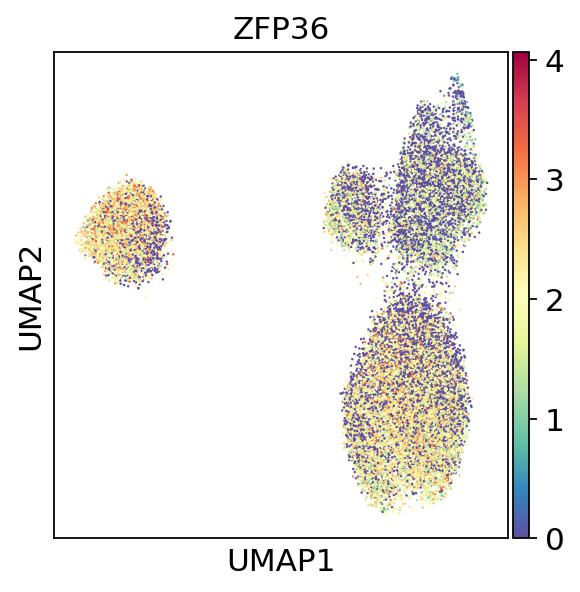

In [14]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata, 
    color=[ 'ZFP36'], 
    palette='tab20',  
    color_map='Spectral_r', 
    ncols=4,
    wspace = 0.3,
    sort_order = False
)

In [28]:
import numpy as np

In [ ]:
counts = pd.DataFrame(adata_clean.X)
counts.index = adata_clean.obs.index.values
counts = np.transpose(counts)
counts.index = adata_clean.var.index.values
counts.to_csv('adata_MAIT_counts.txt', sep='\t', header = True, index=True)

In [ ]:
counts = np.transpose(counts)
counts.insert(0, 'cell_type', adata_clean.obs['status'])

In [ ]:
counts.iloc[:,0].to_csv('adata_MAIT_metadata.txt', sep='\t', header = True, index=True)

Use now generated files to run the differential expression analysis with the R code below.

In [4]:
%load_ext rpy2.ipython

In [5]:
%R if (!require("pacman")) install.packages("pacman")
%R pacman::p_load(MAST, data.table, openxlsx, ggplot2, ggpubr, RColorBrewer, dichromat)

R[write to console]: Loading required package: pacman



1,1,1,...,1,1,1


In [6]:
%R counts = read.csv('adata_MAIT_counts.txt', sep = '\t', row.names=1, header=TRUE)

,X239460343462702.MAIT_healthy,X196524360781035.MAIT_healthy,X240497429493989.MAIT_healthy,X164827621968286.MAIT_healthy,X236245188766627.MAIT_healthy,X201532573903134.MAIT_healthy,X129586387381548.MAIT_healthy,X125720897411420.MAIT_healthy,X169793570356524.MAIT_healthy,X201448674678571.MAIT_healthy,...,X230670705026859.MAIT_patients,X130132622297324.MAIT_patients,X122350409726181.MAIT_patients,X135066465549102.MAIT_patients,X122497275226934.MAIT_patients,X157673038998757.MAIT_patients,X191551088278325.MAIT_patients,X205925117479260.MAIT_patients,X166480110304101.MAIT_patients,X197137748125476.MAIT_patients
A1BG,2.205085,0.0,1.188314,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
A1CF,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
A2M,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.399565,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,2.181034
A2ML1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
A3GALT2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
ZYG11B,0.000000,0.0,1.188314,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000
ZYX,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.526275,0.0,0.0,0.0,...,0.0,0.000000,1.431923,0.0,0.0,0.000000,1.61104,0.0,0.0,0.000000
ZZEF1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,1.371699,0.00000,0.0,0.0,0.000000


In [7]:
%R meta = read.csv('adata_MAIT_metadata.txt', sep = '\t', row.names=1,  header=TRUE)

,cell_type
239460343462702.MAIT_healthy,healthy
196524360781035.MAIT_healthy,healthy
240497429493989.MAIT_healthy,healthy
164827621968286.MAIT_healthy,healthy
236245188766627.MAIT_healthy,healthy
...,...
157673038998757.MAIT_patients,patient
191551088278325.MAIT_patients,patient
205925117479260.MAIT_patients,patient
166480110304101.MAIT_patients,patient


In [8]:
%R dataset = list(t(counts), meta)
%R names(dataset) <- c("counts", "meta")

'counts','meta'


In [9]:
# load data into MAST object
%R sca <- FromMatrix(t(dataset$counts), dataset$meta) 
%R sca

R[write to console]: `cData` has no wellKey.  I'll make something up.

R[write to console]: Assuming data assay in position 1, with name et is log-transformed.



<rpy2.robjects.methods.RS4 object at 0x2ac55505d9c0> [RTYPES.S4SXP]
R classes: ('SingleCellAssay',)

In [10]:
# calculate and store the cdr per cell
%R cdr2 <-colSums(assay(sca)>0)
%R colData(sca)$cngeneson <- scale(cdr2)

array([[-2.04338472],
       [-0.2079725 ],
       [ 1.43845312],
       ...,
       [ 0.15078172],
       [-0.35531799],
       [-0.3200832 ]])

In [11]:
%R colData(sca)$cell_type = as.factor(colData(sca)$cell_type)

['healthy', 'healthy', 'healthy', 'healthy', 'healthy', ..., 'patient', 'patient', 'patient', 'patient', 'patient']
Length: 24463
Categories (2, object): ['healthy', 'patient']

In [12]:
# check cluster levels
%R levels(colData(sca)$cell_type)

'healthy','patient'


In [13]:
%R DE_list = list()

<rpy2.robjects.vectors.ListVector object at 0x2ac553420e80> [RTYPES.VECSXP]
R classes: ('list',)
[]

In [14]:
%R step =0;
%R colData(sca)$comparison = colData(sca)$cell_type

['healthy', 'healthy', 'healthy', 'healthy', 'healthy', ..., 'patient', 'patient', 'patient', 'patient', 'patient']
Length: 24463
Categories (2, object): ['healthy', 'patient']

In [15]:
length = %R length(levels(colData(sca)$cell_type))

In [16]:
%%R for (x in 1:length(levels(colData(sca)$cell_type))){
    #reset the original clusters' order for each run
    colData(sca)$comparison = colData(sca)$cell_type
    #replace levels with the cluster of interest vs REST
    levels(colData(sca)$comparison) = c(rep('REST', step), levels(colData(sca)$comparison)[x] , rep('REST', 2-step))
    #make sure REST is the reference group (denominator)
    comp<-factor(colData(sca)$comparison)
    comp<-relevel(comp,"REST")
    colData(sca)$comparison<-comp
    
    zlmComp <- zlm(~comparison + cngeneson, sca)
    subsetComp = paste('comparison', levels(colData(sca)$comparison)[2], sep="")
    summaryComp <- summary(zlmComp, doLRT=subsetComp) 
    summaryCmp <- summaryComp$datatable
    #hurdle P values
    fcHurdle <- merge(summaryCmp[contrast==subsetComp & component=='H',.(primerid, `Pr(>Chisq)`)], summaryCmp[contrast==subsetComp & component=='logFC', .(primerid, coef, ci.hi, ci.lo)], by='primerid') #logFC coefficients

    fcHurdle[,fdr:=p.adjust(`Pr(>Chisq)`, 'fdr')]
    #fcHurdleSig <- merge(fcHurdle[fdr<.05 & abs(coef)>FCTHRESHOLD], as.data.table(mcols(sca)), by='primerid')
    setorder(fcHurdle, fdr)
    fcHurdle
    DE_list[[x]] = fcHurdle
    
    step=step+1
}

R[write to console]: 
Done!

R[write to console]: 
Done!

R[write to console]: Combining coefficients and standard errors

R[write to console]: Calculating log-fold changes

R[write to console]: Calculating likelihood ratio tests

R[write to console]: Refitting on reduced model...

R[write to console]: 
Done!



In [17]:
%R names(DE_list) <- levels(colData(sca)$cell_type)

'healthy','patient'


In [18]:
%%R for (iterate in 1:length(levels(colData(sca)$cell_type))){ 
        fcHurdle = DE_list[[iterate]]
        fcHurdle_f = fcHurdle[which(fcHurdle$fdr<=0.05),]
        print(fcHurdle_f[order(fcHurdle_f[,-fcHurdle_f$coef])[1:20],])
    }

    primerid    Pr(>Chisq)      coef     ci.hi     ci.lo           fdr
 1:      FOS  0.000000e+00 1.8658197 1.8990874 1.8325520  0.000000e+00
 2:  TNFAIP3  0.000000e+00 1.3369156 1.3685820 1.3052491  0.000000e+00
 3:      JUN  0.000000e+00 1.0841357 1.1233540 1.0449175  0.000000e+00
 4:    DUSP1  0.000000e+00 0.9707911 1.0021866 0.9393956  0.000000e+00
 5:   NFKBIA  0.000000e+00 0.9182759 0.9506761 0.8858756  0.000000e+00
 6:    YPEL5  0.000000e+00 0.7210761 0.7482494 0.6939029  0.000000e+00
 7: HSP90AB1  0.000000e+00 0.7191243 0.7472200 0.6910286  0.000000e+00
 8:     JUND  0.000000e+00 0.7164845 0.7428186 0.6901504  0.000000e+00
 9:   PABPC1  0.000000e+00 0.6938071 0.7190951 0.6685191  0.000000e+00
10:    ZFP36  0.000000e+00 0.6305003 0.6607224 0.6002782  0.000000e+00
11:   NAP1L1  0.000000e+00 0.5933169 0.6231835 0.5634504  0.000000e+00
12:    HSPA5 1.284571e-322 0.5670943 0.5979596 0.5362290 6.454474e-320
13:  TSC22D3 3.903119e-322 0.5324485 0.5633680 0.5015290 1.910947e-319
14:   

🕹️ Use the command below to save all comparisons from the differential expression analysis with MAST as an excel document in different sheets.

In [19]:
%R write.xlsx(DE_list, file = "adata_MAIT_comparison_DGE.xlsx")

<rpy2.robjects.methods.RS4 object at 0x2ac554c16ec0> [RTYPES.S4SXP]
R classes: ('Workbook',)